In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [10]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [12]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [15]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [14]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [8]:
# Step 3: Data Cleaning
# Checking for null values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
CalculatedTotal    0
dtype: int64


In [16]:
# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [18]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [20]:
# Step 4: Merge Datasets
merged_df = pd.merge(transactions, customers, on="CustomerID")
merged_df = pd.merge(merged_df, products, on="ProductID")

In [21]:
merged_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CalculatedTotal,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,601.36,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,902.04,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [22]:
merged_df.shape

(1000, 14)

In [39]:
# Step 5: General Overview
print("The number of categories of products present is: {}".format(merged_df['Category'].value_counts().shape[0]))
print(merged_df['Region'].value_counts())
print(merged_df['Category'].value_counts())

The number of categories of products present is: 4
Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64
Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64


In [37]:
# Merge Transactions and Products to compare prices
products_copy = products
products_copy.rename(columns={'Price': 'Price_y'}, inplace=True)
price_check_df = pd.merge(transactions, products, on="ProductID")

# Check for discrepancies
price_check_df['PriceDiscrepancy'] = price_check_df['Price'] - price_check_df['Price_y']

# Filter discrepancies
discrepancies = price_check_df[price_check_df['PriceDiscrepancy'] != 0]

# Count discrepancies above and below the original price
above_price_count = (discrepancies['PriceDiscrepancy'] > 0).sum()
below_price_count = (discrepancies['PriceDiscrepancy'] < 0).sum()

# Display results
print(f"Total Discrepancies: {len(discrepancies)}")
print(f"Number of products sold ABOVE original price: {above_price_count}")
print(f"Number of products sold BELOW original price: {below_price_count}")

# Display the discrepancies DataFrame for inspection
print(discrepancies[['ProductID', 'ProductName', 'Price_y', 'Price', 'PriceDiscrepancy']])

Total Discrepancies: 0
Number of products sold ABOVE original price: 0
Number of products sold BELOW original price: 0
Empty DataFrame
Columns: [ProductID, ProductName, Price_y, Price, PriceDiscrepancy]
Index: []


In [26]:
# Step 6: Cross-Tables
# Revenue by Region
region_revenue = merged_df.groupby('Region')['TotalValue'].sum().reset_index()
region_revenue.head()

,Region,TotalValue
0,Asia,152074.97
1,Europe,166254.63
2,North America,152313.40
3,South America,219352.56


In [28]:
# Product Category Trends
category_trends = merged_df.groupby('Category')['Quantity'].sum().reset_index()
category_trends.head()

,Category,Quantity
0,Books,681
1,Clothing,590
2,Electronics,627
3,Home Decor,639


In [42]:
# Top Customers by Revenue
top_customers = merged_df.groupby('CustomerID')['TotalValue'].sum().reset_index()
top_customers = top_customers.sort_values(by='TotalValue', ascending=False).head(10)

# Merge with the Customers DataFrame to get customer names
top_customers = pd.merge(top_customers, customers[['CustomerID', 'CustomerName']], on='CustomerID')

# Display the result
top_customers.head()

,CustomerID,TotalValue,CustomerName
0,C0141,10673.87,Paul Parsons
1,C0054,8040.39,Bruce Rhodes
2,C0065,7663.70,Gerald Hines
3,C0156,7634.45,William Adams
4,C0082,7572.91,Aimee Taylor


In [30]:
# Monthly Active Users (MAU)
merged_df['TransactionMonth'] = merged_df['TransactionDate'].dt.to_period('M')
mau = merged_df.groupby('TransactionMonth')['CustomerID'].nunique().reset_index()
mau.head()

,TransactionMonth,CustomerID
0,2023-12,4
1,2024-01,83
2,2024-02,66
3,2024-03,65
4,2024-04,70


C:\Users\sabya\AppData\Local\Temp\ipykernel_10056\3326847963.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_revenue, x='Region', y='TotalValue', palette='viridis')


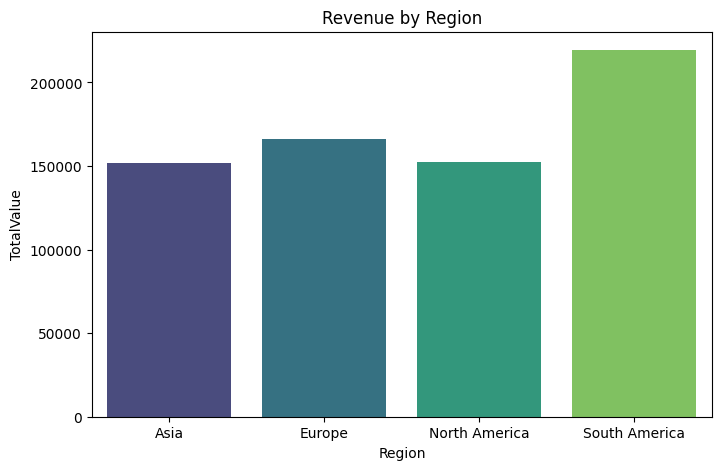

In [31]:
# Step 7: Visualizations
# Revenue by Region
plt.figure(figsize=(8, 5))
sns.barplot(data=region_revenue, x='Region', y='TotalValue', palette='viridis')
plt.title("Revenue by Region")
plt.show()

C:\Users\sabya\AppData\Local\Temp\ipykernel_10056\2327965286.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_trends, x='Category', y='Quantity', palette='viridis')


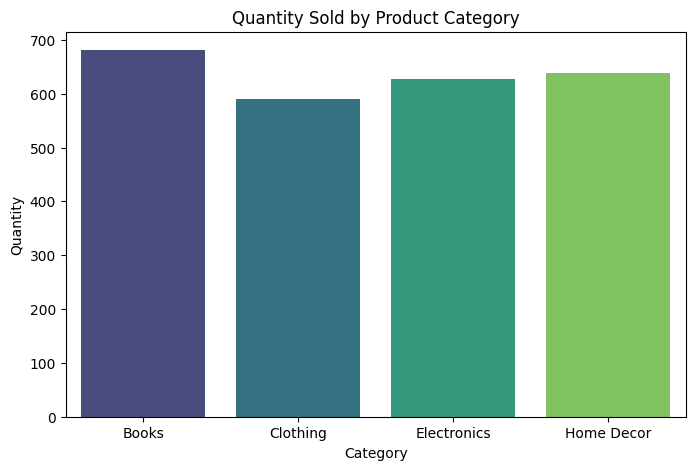

In [32]:
# Product Category Trends
plt.figure(figsize=(8, 5))
sns.barplot(data=category_trends, x='Category', y='Quantity', palette='viridis')
plt.title("Quantity Sold by Product Category")
plt.show()

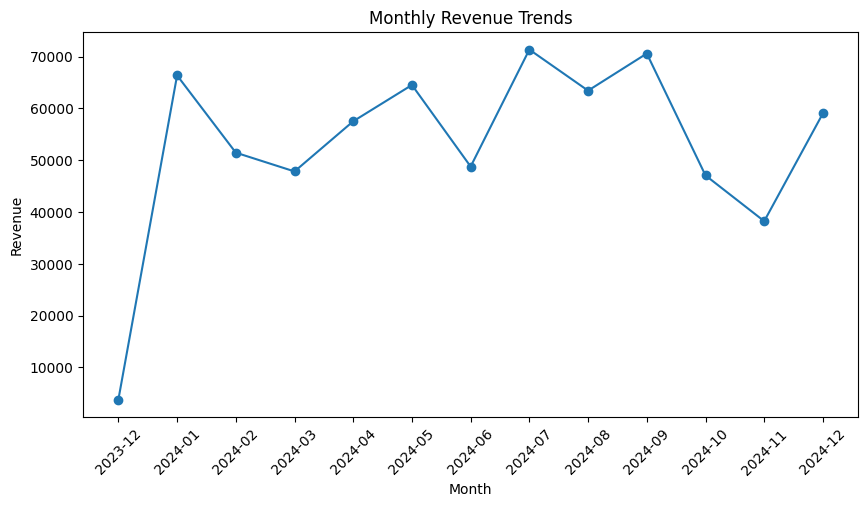

In [33]:
# Revenue Trends
revenue_trends = merged_df.groupby('TransactionMonth')['TotalValue'].sum().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(revenue_trends['TransactionMonth'].astype(str), revenue_trends['TotalValue'], marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trends")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

C:\Users\sabya\AppData\Local\Temp\ipykernel_10056\3227717498.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='CustomerID', y='TotalValue', palette='viridis')


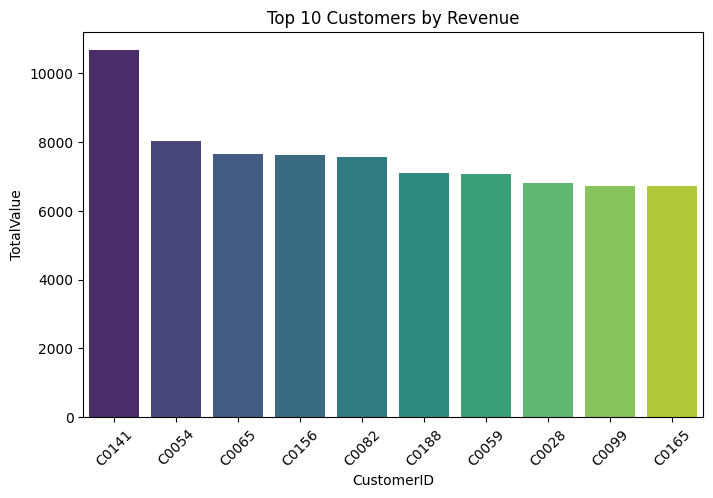

In [34]:
# Top Customers by Revenue
plt.figure(figsize=(8, 5))
sns.barplot(data=top_customers, x='CustomerID', y='TotalValue', palette='viridis')
plt.title("Top 10 Customers by Revenue")
plt.xticks(rotation=45)
plt.show()

In [41]:
top_customers.head()

,CustomerID,TotalValue
140,C0141,10673.87
53,C0054,8040.39
64,C0065,7663.70
155,C0156,7634.45
81,C0082,7572.91


In [47]:
# Display insights
print("1. Revenue by Region:")
print(region_revenue)

print("\n2. Most Sold Categories:")
print(category_trends)

print("\n3. Top 10 Customers:")
print(top_customers[['CustomerID','CustomerName', 'TotalValue']])

print("\n4. Monthly Active Users:")
print(mau)


1. Revenue by Region:
          Region  TotalValue
0           Asia   152074.97
1         Europe   166254.63
2  North America   152313.40
3  South America   219352.56

2. Most Sold Categories:
      Category  Quantity
0        Books       681
1     Clothing       590
2  Electronics       627
3   Home Decor       639

3. Top 10 Customers:
  CustomerID          CustomerName  TotalValue
0      C0141          Paul Parsons    10673.87
1      C0054          Bruce Rhodes     8040.39
2      C0065          Gerald Hines     7663.70
3      C0156         William Adams     7634.45
4      C0082          Aimee Taylor     7572.91
5      C0188             Anna Ball     7111.32
6      C0059  Mrs. Kimberly Wright     7073.28
7      C0028         Jennifer Pena     6819.57
8      C0099          Rodney Eaton     6715.72
9      C0165         Juan Mcdaniel     6708.10

4. Monthly Active Users:
   TransactionMonth  CustomerID
0           2023-12           4
1           2024-01          83
2           2024-02  